# Example 1.2.2
The perceptron rule of Example 1.2.1 does not converge when the data is not linearly separable. An easy fix for this problem is to update the weights using the minimum mean error criterion. This example implements this rule .

### Libraries and function definitions
Here we define the activation function, its derivative and some accessory functions for representation.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as sp

def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def dtanh(z):
    return (1-tanh(z)**2)

# Define functions to plot the results. Do not mind this part just yet.
def line(w,b,x):
    y=-b/w[1]-x*w[0]/w[1]
    y=np.reshape(y,1)
    return y

def plots(X,y,w,b,j,k):
    xmin=X.min()
    xmax=X.max()
    indexn=np.where(y==-1)
    indexp=np.where(y==1)
    plt.plot(X[0,indexp], X[1,indexp], 'k+')
    plt.plot(X[0,indexn], X[1,indexn], 'k.')
    if (j>=0):
        if (y[j]==1):
            plt.plot(X[0,j], X[1,j], 'ko')
        else:
            plt.plot(X[0,j], X[1,j], 'ko')
    if (k>=0):
        plt.plot([xmin,xmax],[line(w,b,xmin),line(w,b,xmax)],'k')
        if (j==-1):
            plt.title("Iteration "+str(k),fontsize=20)
        else:
            plt.title("Iteration "+str(k)+", sample "+str(j),fontsize=20)
    plt.axis([-3,3,-3,3])
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

eta=0.2 # Here we set eta. If it is negative, the data will not be separable

### Data generation

We get some separable data. The script generates data such that $y_i ({\bf w}^\top {\bf x}_i + b)>\eta$, where $\eta$ is given, this is, the data is separable with a margin $\eta$ over the plane. You can modify the number $N$ of data (line 1) and the value of $\eta$ (line 2). A positive value of $\eta$ produces separable data. A negative value produces nonseparable data.

C:\Users\aswathyr\AppData\Local\Temp\ipykernel_16460\1208905130.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[var]=np.sign(np.random.randn(1)) # Add a random label


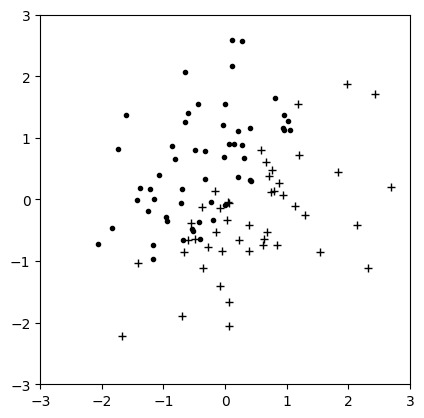

In [2]:
N=100                       # Number of data

eta=-0.2                     # Here we set eta. If it is negative, the data will not be separable

w=np.array([[0.5],[-0.5]])  # Define some optimal separating hyperplane. The data
b=np.array(0)               # is generated at bot sides of this plane with y(wx + b) > nu
X=np.zeros((2,N))           # Empty variables for the data and the labels
y=np.ones((N))

for var in range(N):
    y_=-float('inf')        # We initialize the clasification result to -infinity so the loop below starts.
    while (y_*y[var])<eta:  # We discard the data that the hyperplane cannot classify with y(wx + b) > eta
        x=np.random.randn(2,1) # Generate a random vector of dimension 2
        y_=w.T@x+b          # Get the classification result
        y[var]=np.sign(np.random.randn(1)) # Add a random label
    X[:,var]=x.T            # Store the sample if it has been properly classified

plots(X,y,w,b,-1,-1)   # Plot the result (and save it)

### MMSE update rule

After initializing the classifier parameters ${\bf w}$ and $b$, we classify all training data one at a time and update the classifier parameters using the MMSE criterion. Notice that the signs of the update are changed with respect to the ones appearing in the book, since in the book expression $f^2({z})-1$ is used, which is equal to $-\frac{d\text{tanh(z)}}{dz}$.

The script plots the initial and final positions of the separating line.

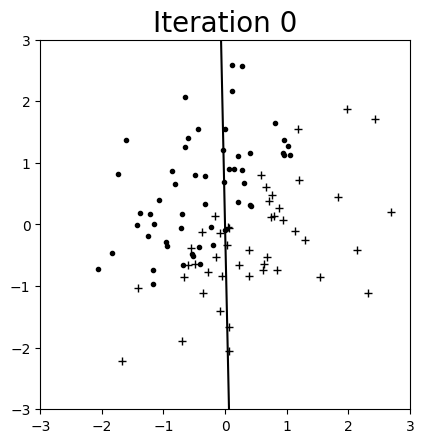

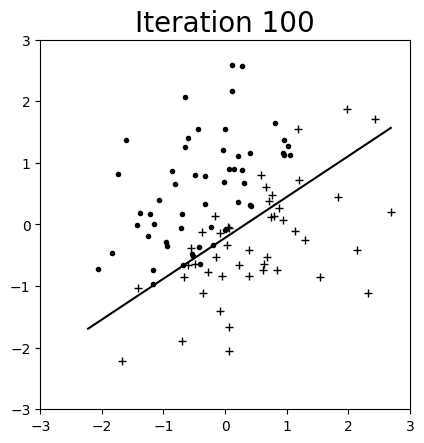

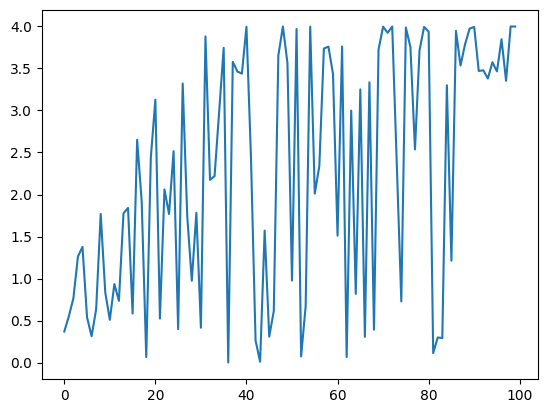

In [3]:
from matplotlib.backends.backend_pdf import PdfPages
w = np.random.rand(2,1) # Initialize the values of the classifier parameters.
b = np.array(0)
k = 0                   # Initialize the iteration counter.
mu=0.1;
plots(X,y,w,b,-1,k)       # Plot the data and classification boundary
for i in range(1):
    for j in range(N):                # For all samples in the dataset
        x = np.reshape(X[:,j],(2,1))  # Get sample j from the dataset
        z=w.T@x + b
        y_= tanh(z)                   # Classify it
        e=y[j]-y_
        if (k==0):
            E=e**2
        else:
            E=np.concatenate((E,e**2))
        k = k + 1                     # Update the iteration counter
        w = w - mu*e*dtanh(z)*x       # Update the classifier parameters
        b = b - mu*e*dtanh(z)

# Plot the final result and compute the bound on the number of iterations
plots(X,y,w,b,-1,k)

plt.plot(range(E.size),E)

plt.show()
